# Ford Go Bike

In [53]:
import glob, os
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
from IPython.core.display import Image, display
from mpl_toolkits.basemap import Basemap
from PIL import Image
import pylab as pl

%matplotlib inline

sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,6)})
sns.set(font_scale=1.2)
sns.set_palette("pastel")
base_color = sns.color_palette()[0]

## 1. Gather Data
Gather data from local csv file.

In [24]:
# import downloaded csv files
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "data/*.csv"))), ignore_index=True, sort=True)

In [28]:
df.shape

(3015214, 16)

In [29]:
df.index.duplicated().sum()

0

## 2. Assess Data

In [30]:
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,1035,No,598,114.0,37.764478,-122.402570,Rhode Island St at 17th St,2018-03-01 00:09:45.1870,1988.0,Male,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-02-28 23:59:47.0970,Subscriber
1,1673,No,943,324.0,37.788300,-122.408531,Union Square (Powell St at Post St),2018-02-28 23:36:59.9740,1987.0,Male,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2018-02-28 23:21:16.4950,Customer
2,3498,No,18587,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:42.9250,1986.0,Female,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:55.1900,Customer
3,3129,No,18558,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:12.4500,1981.0,Male,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:53.6210,Customer
4,1839,Yes,885,297.0,37.322980,-121.887931,Locust St at Grant St,2018-02-28 23:29:58.6080,1976.0,Female,308.0,37.336802,-121.894090,San Pedro Square,2018-02-28 23:15:12.8580,Subscriber


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015214 entries, 0 to 3015213
Data columns (total 16 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(7), int64(2), object(7)
memory usage: 368.1+ MB


In [32]:
df.describe()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude
count,3.015214e+06,3.015214e+06,3.002777e+06,3.015214e+06,3.015214e+06,2.808247e+06,3.002777e+06,3.015214e+06,3.015214e+06
mean,2.654638e+03,8.800043e+02,1.174737e+02,3.776888e+01,-1.223526e+02,1.982997e+03,1.192539e+02,3.776874e+01,-1.223531e+02
std,1.660454e+03,2.502496e+03,1.015882e+02,1.005976e-01,1.465561e-01,1.046344e+01,1.017029e+02,1.007025e-01,1.469537e-01
min,1.000000e+01,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,1.878000e+03,3.000000e+00,3.726331e+01,-1.224737e+02
25%,1.312000e+03,3.520000e+02,3.000000e+01,3.777143e+01,-1.224108e+02,1.978000e+03,3.000000e+01,3.777106e+01,-1.224117e+02
50%,2.531000e+03,5.570000e+02,8.500000e+01,3.778127e+01,-1.223974e+02,1.985000e+03,8.700000e+01,3.778107e+01,-1.223983e+02
75%,3.701000e+03,8.730000e+02,1.820000e+02,3.779591e+01,-1.222948e+02,1.990000e+03,1.830000e+02,3.779539e+01,-1.222935e+02
max,7.082000e+03,8.636900e+04,4.070000e+02,4.551000e+01,-7.357000e+01,2.001000e+03,4.070000e+02,4.551000e+01,-7.357000e+01


In [33]:
# missings in variables
df.isnull().sum()

bike_id                         0
bike_share_for_all_trip    519700
duration_sec                    0
end_station_id              12437
end_station_latitude            0
end_station_longitude           0
end_station_name            12437
end_time                        0
member_birth_year          206967
member_gender              206534
start_station_id            12437
start_station_latitude          0
start_station_longitude         0
start_station_name          12437
start_time                      0
user_type                       0
dtype: int64

In [34]:
# missings in variables
df.isnull().sum()/df.shape[0]

bike_id                    0.000000
bike_share_for_all_trip    0.172359
duration_sec               0.000000
end_station_id             0.004125
end_station_latitude       0.000000
end_station_longitude      0.000000
end_station_name           0.004125
end_time                   0.000000
member_birth_year          0.068641
member_gender              0.068497
start_station_id           0.004125
start_station_latitude     0.000000
start_station_longitude    0.000000
start_station_name         0.004125
start_time                 0.000000
user_type                  0.000000
dtype: float64

In [35]:
df['bike_share_for_all_trip'].value_counts()

No     2277409
Yes     218105
Name: bike_share_for_all_trip, dtype: int64

In [36]:
df['start_station_id'].unique()

array([284.,   6.,  93., 308., 312., 316., 198., 176., 295., 307., 287.,
       239., 293., 310.,  88., 121.,  66., 317., 129., 245., 108., 235.,
       241., 247., 341., 202., 183.,  45., 246.,  78., 171., 100.,  98.,
       208.,  84., 232., 230.,  60., 112., 339.,  31.,   3.,  22.,  47.,
       126.,  75.,   4., 280., 134., 250., 249., 324., 296., 285., 130.,
        80., 201., 279., 113.,  81.,  76., 186., 160.,  36., 244.,  64.,
        67., 311.,  30., 196., 194., 323.,   5.,  17., 342., 123., 141.,
        41., 327., 254., 240.,  13.,  58.,  21.,  37., 133.,  89.,  14.,
       120., 243., 223., 266.,  25.,  19.,  71.,  90.,  85., 101., 180.,
        24., 182., 109.,  49., 153., 205., 163.,  27., 181., 337., 190.,
        42.,  16., 300.,  53.,  95., 175., 116.,  74.,   8.,  44., 162.,
       102., 197., 127., 137.,   7.,  59., 145.,  11.,  18.,  79.,  86.,
       269.,  15., 105.,  23.,  62., 336.,  20., 114., 309.,  33., 106.,
       200.,  77., 132., 177., 267., 233.,   9.,  4

In [37]:
df[df['end_station_id'].isnull()].shape

(12437, 16)

In [38]:
df['bike_id'].duplicated().any()

True

In [39]:
df['member_gender'].value_counts()

Male      2082988
Female     680192
Other       45500
Name: member_gender, dtype: int64

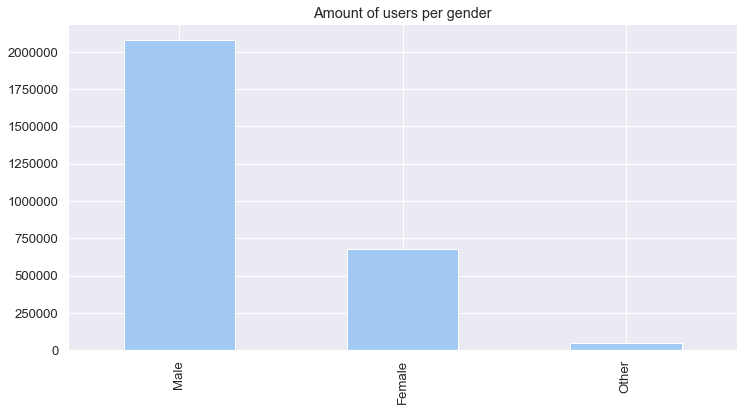

In [40]:
df['member_gender'].value_counts().plot(kind='bar', title='Amount of users per gender');

In [41]:
df['end_station_id'].unique()

array([114., 324.,  15., 297., 288., 310., 196., 189., 327., 277., 312.,
       188., 281., 336., 214.,  11.,  22., 304.,  93.,  85., 274., 120.,
        67., 235., 248., 241., 295., 180., 177.,  77., 240.,  41., 166.,
       204.,  24., 107.,  76.,  27.,  53., 266., 232., 160.,  89.,  88.,
       195.,  75.,  55.,  81., 208., 106., 145.,   5.,  95.,  49., 305.,
       263., 123., 239.,  61., 296., 179.,  44., 110., 144., 249.,  70.,
       129., 206., 211., 139., 126., 109.,  43., 200., 150., 338.,  79.,
       254.,  45.,  30.,  16.,  36., 197., 194.,  66., 119., 127., 210.,
       317.,  62., 244., 238.,   3.,   6.,  33.,  71.,  78.,  72., 121.,
       223., 246., 134.,  58.,  90.,  18.,  29.,  13., 112.,  63.,  86.,
       173., 284., 213., 342.,  42., 162.,  97.,  39., 285., 102., 321.,
       156.,  14., 202., 272.,  31., 323.,  60., 169.,  26., 124., 181.,
         4., 294.,  21., 212.,  80.,  74., 157., 186.,  59., 245., 230.,
       164.,  52., 105., 138.,  96., 205., 269.,  9

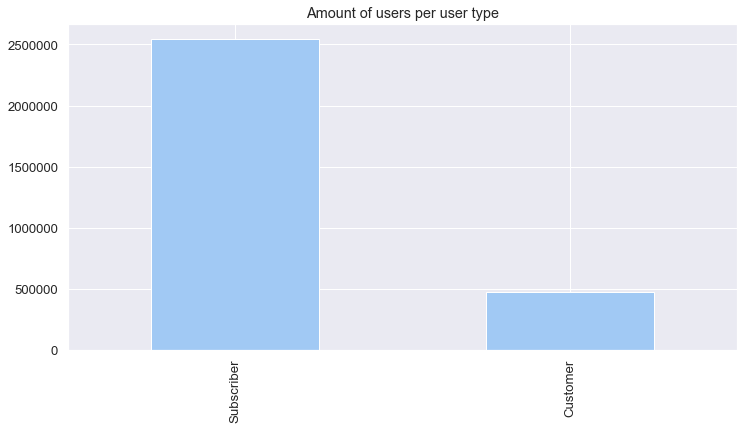

In [42]:
df['user_type'].value_counts().plot(kind='bar', title='Amount of users per user type')

In [43]:
print(df['member_birth_year'].min(),df['member_birth_year'].max())

1878.0 2001.0


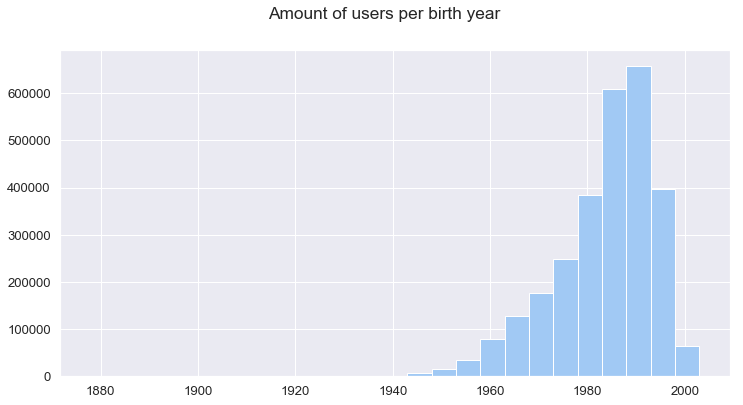

In [46]:
bins = np.arange(df['member_birth_year'].min(), df['member_birth_year'].max()+5, 5)
axes = df['member_birth_year'].hist(bins=bins)
pl.suptitle("Amount of users per birth year");

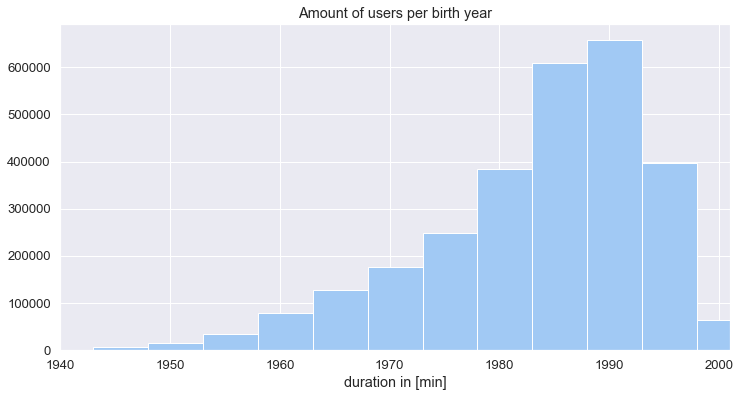

In [47]:
bins = np.arange(df['member_birth_year'].min(), df['member_birth_year'].max()+5, 5)
plt.hist(df['member_birth_year'], bins = bins)
plt.xlabel('duration in [min]')
plt.xlim(1940, df['member_birth_year'].max()) # could also be called as plt.xlim((0, 35));
plt.title('Amount of users per birth year');

Text(0.5, 1.0, 'Users birth year per user type')

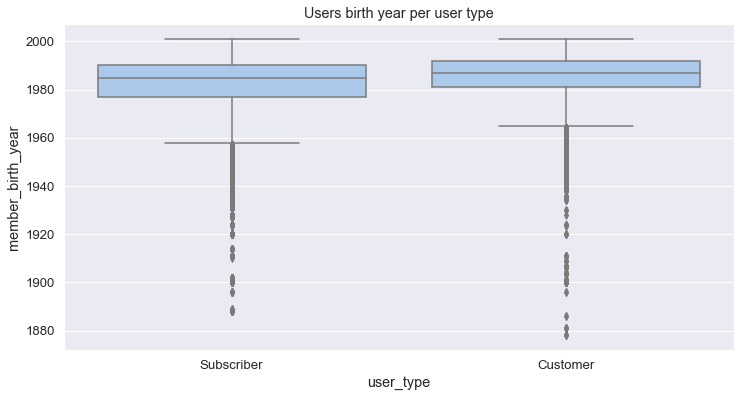

In [55]:
ax1 = sns.boxplot(data = df, x = 'user_type', y = 'member_birth_year', color = base_color)
ax1.set_title('Users birth year per user type');

In [56]:
(df['end_station_id'].isnull() == df['start_station_id'].isnull()).sum()

3015214

In [57]:
(df['end_station_id'].isnull() == df['end_station_name'].isnull()).sum()

3015214

In [58]:
(df['start_station_id'].isnull() == df['start_station_name'].isnull()).sum()

3015214

All variables `end_station_id`, `end_station_name`, `start_station_id` and `start_station_name` have missings in the same rows.

In [59]:
print(pd.to_datetime(df['start_time']).min(), pd.to_datetime(df['start_time']).max())
print(pd.to_datetime(df['end_time']).min(), pd.to_datetime(df['end_time']).max())

2017-06-28 09:47:36.347000 2019-03-31 23:59:47.706000
2017-06-28 09:52:55.338000 2019-04-01 11:52:30.200000


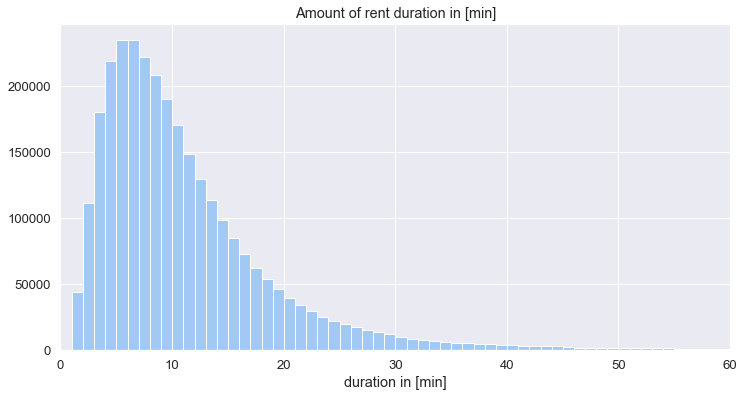

In [61]:
#duration_hours = df['duration_sec']/60/60  # duration time in hours
duration_mins = df['duration_sec']/60 # duration time in minutes
edges = np.arange(duration_mins.min(), duration_mins.max()+1, 1)
plt.hist(duration_mins, bins = edges)
plt.xlabel('duration in [min]')
plt.xlim(0, 60) 
plt.title('Amount of rent duration in [min]');

**Result:**

Quality issues:
- `bike_share_for_all_trip` is string, shall be of data type bool.
- 17.2 % missings in variable `bike_share_for_all_trip`.
- `end_time` and `start_time` are string, must be of data type datetime. 
-  There are missings in `start_station_id` and `end_station_id`. This is why it both are of type float instead of integer.
-  There are missings in `member_birth_year`. This is why it is a float type instead of integer.
- There are a lot of outliers in the variable `member_birth_year`.
- Same amount of missings in `end_station_id`, `end_station_name`, `start_station_id` and `start_station_name`, also all missings in the same rows.
- About 6.8 % missings in the variables `member_birth_year` and `member_gender`

Tidyness issues:
- We can not move the membeer observations (`member_birth_year`, `member_gender` and `user_type`) into another table, because we don't have member id's.
- The station information should be in another table (`start_station_id`, `start_station_latitude`, `start_station_longitude`, `start_station_name`, `end_station_id`, `end_station_latitude`, `end_station_longitude`, `end_station_name`). Where start and end is not necessary anymore. Only for reference (`start_station_id` and `end_station_id`) in the main rent table.



In [62]:
list(df)

['bike_id',
 'bike_share_for_all_trip',
 'duration_sec',
 'end_station_id',
 'end_station_latitude',
 'end_station_longitude',
 'end_station_name',
 'end_time',
 'member_birth_year',
 'member_gender',
 'start_station_id',
 'start_station_latitude',
 'start_station_longitude',
 'start_station_name',
 'start_time',
 'user_type']

## 3. Tidying + Cleaning

### Tidying
1. There are three observations: **rent activity** information, **member** informations and **rent stations** information:
    - Due to anonymization the **member** information is not enough to extract each individual member into a member data base. The member information we have in each row is not obviously/distinctly refarable to one single member. But we can extract the members information per rent activity in a seperated table and keep the rent_id. With this table we can make analysis of members in relation general users. But we don't know if less people use the rent service really often or the other way around: if there are much more users using the service only a few times.
    - The **rent activity** table will keep columns: `bike_id`, `bike_share_for_all_trip`, `duration_sec`, `end_station_id`, `end_time`, `member_birth_year`, `member_gender`, `start_station_id`, `start_time`, `user_type`
    - The **rent stations** information wil be moved into another table, where station_id, station_latitude, station_longitude and station_name are merged toegehther from both: start_ and end_stations.(`start_station_id`, `start_station_latitude`, `start_station_longitude`, `start_station_name`, `end_station_id`, `end_station_latitude`, `end_station_longitude`, `end_station_name`).



### Cleaning

2. Convert type of `bike_share_for_all_trip` to data type bool. (There are still 17.2 % missings in variable `bike_share_for_all_trip`.)
3. Convert types of `end_time` and `start_time` to data type datetime. 
4. For every missing in variables: `start_station_id`, `end_station_id`, `end_station_name` and `start_station_name`: Search for other rows, with similar `*_station_latitude`, `*_station_longitude` data And if there are rows with given station_id: use their `*_station_id` to fill. Otherwise: Delete row (station id not known). Then convert `start_station_id` and `end_station_id`to type integer.
5. There are missings in `member_birth_year`. Write -1 to missing years. And convert column into integer.
6. There are a lot of outliers in the variable `member_birth_year`. Find a threshold, that is realistic. And delete values below that threshold. For later statistical computation, remove -1 (missing) values first.




### 3.1 Tidying

In [63]:
df_clean = df.copy()

<span style="color:blue">Define:</span>

1. There are three observations: **rent activity** information, **member** informations and **rent stations** information:
    - The **member** information is not enough to extract it to an seperate table (member information is not obvious/distinct to extract individual members), this is why we can leave this information in the **rent activity table**
    - The **rent activity** table will keep columns: `bike_id`, `bike_share_for_all_trip`, `duration_sec`, `end_station_id`, `end_time`, `member_birth_year`, `member_gender`, `start_station_id`, `start_time`, `user_type`
    - The **rent stations** information wil be moved into another table, where station_id, station_latitude, station_longitude and station_name are merged toegehther from both: start_ and end_stations.(`start_station_id`, `start_station_latitude`, `start_station_longitude`, `start_station_name`, `end_station_id`, `end_station_latitude`, `end_station_longitude`, `end_station_name`).



<span style="color:purple">Code:</span>

In [64]:
df_clean['rent_id'] = df_clean.index # unique?
rent_df = df_clean[['rent_id', 'bike_id', 'bike_share_for_all_trip', 'duration_sec', 'start_station_id', 'start_time', 'end_station_id', 'end_time']].copy()
member_df = df_clean[['rent_id', 'member_gender', 'member_birth_year', 'user_type']].copy()
station_temp_df = df_clean[['start_station_id', 'start_station_latitude', 'start_station_longitude', 'start_station_name', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 'end_station_name']].copy()

In [65]:
start_station_df = pd.DataFrame()
end_station_df = pd.DataFrame()

start_station_df['id'] = station_temp_df['start_station_id']
start_station_df['latitude'] = station_temp_df['start_station_latitude']
start_station_df['longitude'] = station_temp_df['start_station_longitude']
start_station_df['name'] = station_temp_df['start_station_name']
start_station_df.drop_duplicates(subset=['id', 'latitude', 'longitude', 'name'], inplace=True)

end_station_df['id'] = station_temp_df['end_station_id']
end_station_df['latitude'] = station_temp_df['end_station_latitude']
end_station_df['longitude'] = station_temp_df['end_station_longitude']
end_station_df['name'] = station_temp_df['end_station_name']
end_station_df.drop_duplicates(subset=['id', 'latitude', 'longitude', 'name'], inplace=True)

# merge start und end stations
station_df = start_station_df.append(end_station_df)

# drop duplicates
station_df.drop_duplicates(subset=['id', 'latitude', 'longitude', 'name'], inplace=True)
# drop if nan in 'id' and 'name'
station_df.dropna(subset=['id', 'name'], inplace=True)


<span style="color:LightSeaGreen">Test:</span>

In [66]:
print('df_clean shape: ', df_clean.shape)
print('rent_df shape: ', rent_df.shape)
print('member_df shape: ', member_df.shape)
print('station_df shape: ', station_df.shape)

df_clean shape:  (3015214, 17)
rent_df shape:  (3015214, 8)
member_df shape:  (3015214, 4)
station_df shape:  (398, 4)


In [67]:
# is rent id in both tables unique?
print(df_clean.index.duplicated().sum())
print(rent_df['rent_id'].duplicated().sum())
print(member_df['rent_id'].duplicated().sum())
print(station_df.duplicated().sum())

0
0
0
0


### 3.2. Cleaning

In [68]:
rent_clean = rent_df.copy()
member_clean = member_df.copy()
station_clean = station_df.copy()

<span style="color:blue">Define:</span>

2. Convert type of `bike_share_for_all_trip` to data type bool. (There are still 17.2 % missings in variable `bike_share_for_all_trip`.)

<span style="color:purple">Code:</span>

In [69]:
rent_clean['bike_share_for_all_trip'].unique()

array(['No', 'Yes', nan], dtype=object)

In [70]:
rent_clean['bike_share_for_all_trip'].replace({'Yes': True, 'No': False}, inplace=True)
#rent_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype(bool)

Can not be converted to bool. Because then the missings are filled with False.

<span style="color:LightSeaGreen">Test:</span>

In [71]:
rent_clean['bike_share_for_all_trip'].value_counts()

False    2277409
True      218105
Name: bike_share_for_all_trip, dtype: int64

In [72]:
rent_clean['bike_share_for_all_trip'].isnull().sum()

519700

<span style="color:blue">Define:</span>

3. Convert types of `end_time` and `start_time` to data type datetime. 

<span style="color:purple">Code:</span>

In [73]:
rent_clean['end_time'] = pd.to_datetime(rent_clean['end_time'])
rent_clean['start_time'] = pd.to_datetime(rent_clean['start_time'])

<span style="color:LightSeaGreen">Test:</span>

In [74]:
rent_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015214 entries, 0 to 3015213
Data columns (total 8 columns):
rent_id                    int64
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
start_station_id           float64
start_time                 datetime64[ns]
end_station_id             float64
end_time                   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(3), object(1)
memory usage: 184.0+ MB


<span style="color:blue">Define:</span>

4. For every missing in variables: `start_station_id`, `end_station_id`, `end_station_name` and `start_station_name`: Search for other rows, with similar `*_station_latitude`, `*_station_longitude` data And if there are rows with given station_id: use their `*_station_id` to fill. Otherwise: Delete row (station id not known). Then convert `start_station_id` and `end_station_id`to type integer.

<span style="color:purple">Code:</span>

We need to find the closest longitude latitude point (station) for every given longitude, latitude values to find the most realistic sation id and name for the missings in `station_id` and `station_name` of a rent. (solution from: https://stackoverflow.com/questions/41336756/find-the-closest-latitude-and-longitude)

In [75]:
from math import cos, asin, sqrt

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a))

def closest_start(data, location):
    return min(data, key=lambda lookupStation: distance(location['start_station_latitude'],location['start_station_longitude'], lookupStation['latitude'],lookupStation['longitude']))

def closest_end(data, location):
    return min(data, key=lambda lookupStation: distance(location['end_station_latitude'],location['end_station_longitude'], lookupStation['latitude'],lookupStation['longitude']))

tempDataList = [{'lat': 39.7612992, 'lon': -86.1519681}, 
                {'lat': 39.762241,  'lon': -86.158436 }, 
                {'lat': 39.7622292, 'lon': -86.1578917}]

#location = {'lat': 39.7622290, 'lon': -86.1519750}
#print(closest(lookupStation, location))

In [76]:
# all 4 variables are null in the same row (see 2. Assessing Data)
# the connection between latitude and longitude have to be looked up un the data_clean df,
# because there are the only connection, between missing rent_id and longitude/latitude

where_station_id_name_is_missing = df_clean['start_station_id'].isnull()

# here in df_clean is the only combination of old longitude and latitude in whole dataframe
df_id_missings = df_clean[where_station_id_name_is_missing]
print(df_id_missings.shape[0], " rent activities with missing start and end station id and name.")

# new dataframe with latitude and longitude as dictionaries
lookupStation = [{'latitude': row['latitude'], 'longitude': row['longitude']} for i, row in station_clean.iterrows()]

for i, row in df_id_missings.iterrows():
    # find the closest station (euclidean distance)
    start_station = closest_start(lookupStation, row)
    end_station = closest_end(lookupStation, row)
    # extract closest station
    start_latitude = start_station['latitude']
    start_longitude = start_station['longitude']
    end_latitude = end_station['latitude']
    end_longitude = end_station['longitude']
    
    # search for the same station with the longitude and latitude information (search in smaller station dataframe)
    start_station_id_frame = station_clean.query('latitude==@start_latitude & longitude==@start_longitude')
    start_station_id = start_station_id_frame['id'].iloc[0]
    #start_station_name = start_station_id_frame['start_station_name'].iloc[0]
    end_station_id_frame = station_clean.query('latitude==@end_latitude & longitude==@end_longitude')
    end_station_id = end_station_id_frame['id'].iloc[0]
    
    #print(start_station_id)
    #print(end_station_id)
    
    # write the found station id and name to replace missings in the rent_clean dataframe
    rent_clean.loc[i, 'start_station_id'] = start_station_id
    rent_clean.loc[i, 'end_station_id'] = end_station_id
    
    #print("start, end: ", start_station_id, start_station_id)
    #print(" ",end_station_id_frame)
    

(12437, 17)  rent activities with missing start and end station id and name.


<span style="color:LightSeaGreen">Test:</span>

In [77]:
print('BEFORE')
print("Missing in rent_df start: ", rent_df['start_station_id'].isnull().sum())
print("Missing in rent_df start: ", rent_df['end_station_id'].isnull().sum())

print('AFTER')
print("Missing in rent_clean start: ", rent_clean['start_station_id'].isnull().sum())
print("Missing in rent_clean start: ", rent_clean['end_station_id'].isnull().sum())

BEFORE
Missing in rent_df start:  12437
Missing in rent_df start:  12437
AFTER
Missing in rent_clean start:  0
Missing in rent_clean start:  0


<span style="color:blue">Define:</span>

5. There are missings in `member_birth_year`. Write -1 to missing years. And convert column into integer.

**Info:**
--> this is scipped due to keeping missings as NaN instead of -1 is more usefull later.

<span style="color:purple">Code:</span>

In [78]:
#member_clean['member_birth_year'].max()

In [79]:
#member_clean['member_birth_year'].isnull().sum()

In [80]:
#where_birth_is_missing = member_clean['member_birth_year'].isnull()
#member_clean.loc[where_birth_is_missing, 'member_birth_year'] = -1
#member_clean['member_birth_year'] = member_clean['member_birth_year'].astype(int)

<span style="color:LightSeaGreen">Test:</span>

In [81]:
#member_clean.info()

<span style="color:blue">Define:</span>

6. There are a lot of outliers in the variable `member_birth_year`. Find a threshold, that is realistic. And delete values below that threshold. For later statistical computation, remove -1 (missing) values first.

<span style="color:purple">Code:</span>

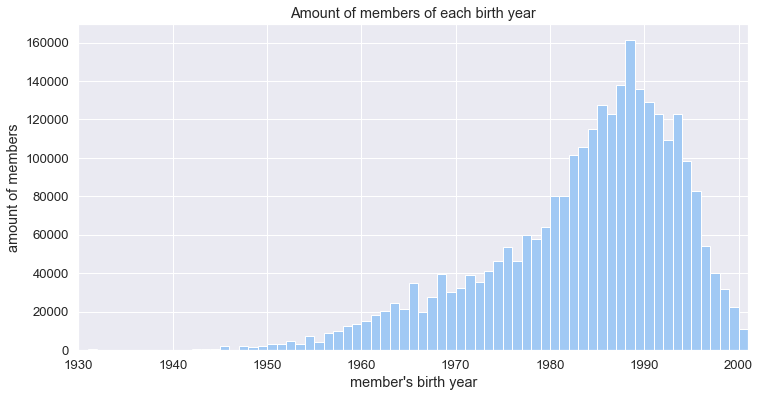

In [82]:
bins = np.arange(member_clean['member_birth_year'].min(), member_clean['member_birth_year'].max()+1, 1)
plt.hist(member_clean['member_birth_year'], bins = bins)
plt.xlabel("member's birth year")
plt.xlim(1930, member_clean['member_birth_year'].max()) 
plt.ylabel('amount of members')
plt.title('Amount of members of each birth year');

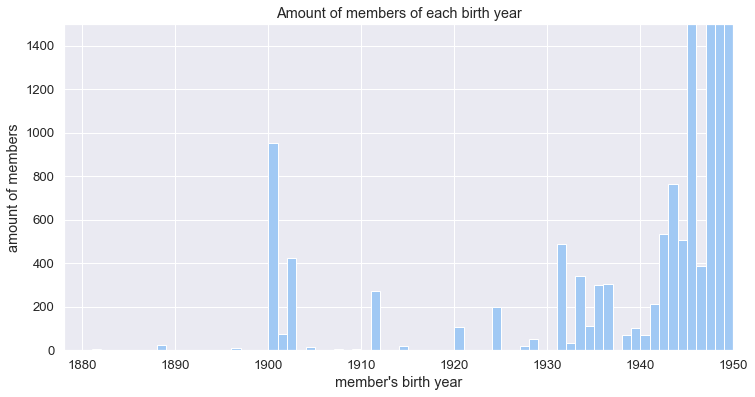

In [83]:
bins = np.arange(member_clean['member_birth_year'].min(), member_clean['member_birth_year'].max()+1, 1)
plt.hist(member_clean['member_birth_year'], bins = bins)
plt.xlabel("member's birth year")
plt.xlim(member_clean['member_birth_year'].min(), 1950)
plt.ylabel('amount of members')
plt.ylim(0, 1500)
plt.title('Amount of members of each birth year');


**What about the peak in 1900?**
- There are multiple (almost 1000) users that set their birth years to 1900.


**If this birth years were true, how old would those user be now?**
- The oldest user would be 137.  


**Are those outliers realistic?**
- The peak of birth year in the 1900 is not that realistic. It is more probable that this comes from an initial birth year set by the system or may also from user fabricating an uncreative fake birth year.

- An age of 137 is really sporty and also using a shared bike service in that age, really honorable! But not really realistic-I would guess.

**Problem:**
- But what would be a realistic age that is trustable? Where do we set a threshold, which data do we want to trust, and which we don't?

**Assumption**
- While looking at the distribution of the outliers of birth years, we assume the threshold 1930 (with a maximum age of 89) is realistic. 

In [84]:
where_birth_year_smaller_1930 = member_clean['member_birth_year'] < 1930
member_clean.loc[where_birth_year_smaller_1930, 'member_birth_year'] = np.NaN

<span style="color:LightSeaGreen">Test:</span>

In [85]:
member_clean['member_birth_year'].min()

1930.0

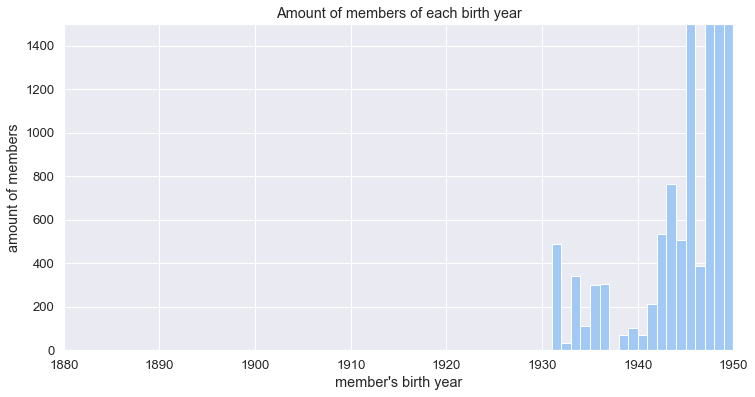

In [86]:
bins = np.arange(member_clean['member_birth_year'].min(), member_clean['member_birth_year'].max()+1, 1)
plt.hist(member_clean['member_birth_year'], bins = bins)
plt.xlabel("member's birth year")
plt.xlim(1880, 1950)
plt.ylabel('amount of members')
plt.ylim(0, 1500)
plt.title('Amount of members of each birth year');

### 3.3 Feature Development

<span style="color:blue">Define:</span>

We can extract informations of the given variables to generate new features:
- year of renting in rent table
- age of the member in member table


<span style="color:purple">Code:</span>

In [88]:
print(rent_df.shape[0])
print(member_df.shape[0])

3015214
3015214


In [89]:
# approximate age at rent time, since only year of birth is known, not month
# therefore rent time is needed
member_df['age'] = pd.to_datetime(rent_df['start_time']).dt.year - member_df['member_birth_year']

<span style="color:LightSeaGreen">Test:</span>

In [90]:
member_df['age'].head()

0    30.0
1    31.0
2    32.0
3    37.0
4    42.0
Name: age, dtype: float64

### 3.4 Store cleaned and tidied data

In [461]:
rent_clean.to_csv('data/cleaned/rent.csv', index=False)
member_clean.to_csv('data/cleaned/member.csv', index=False)
station_clean.to_csv('data/cleaned/station.csv', index=False)

In [463]:
conn = sqlite3.connect("data/cleaned/rent.db")
rent_clean.to_sql("rent", conn, if_exists="replace", index=False)

conn = sqlite3.connect("data/cleaned/member.db")
member_clean.to_sql("member", conn, if_exists="replace", index=False)

conn = sqlite3.connect("data/cleaned/station.db")
station_clean.to_sql("station", conn, if_exists="replace", index=False)

In [2]:
conn = sqlite3.connect("data/cleaned/rent.db")
rent = pd.read_sql_query("select * from rent;", conn)
rent.head()

,rent_id,bike_id,bike_share_for_all_trip,duration_sec,start_station_id,start_time,end_station_id,end_time
0,0,1035,0.0,598,284.0,2018-02-28 23:59:47.097000,114.0,2018-03-01 00:09:45.187000
1,1,1673,0.0,943,6.0,2018-02-28 23:21:16.495000,324.0,2018-02-28 23:36:59.974000
2,2,3498,0.0,18587,93.0,2018-02-28 18:20:55.190000,15.0,2018-02-28 23:30:42.925000
3,3,3129,0.0,18558,93.0,2018-02-28 18:20:53.621000,15.0,2018-02-28 23:30:12.450000
4,4,1839,1.0,885,308.0,2018-02-28 23:15:12.858000,297.0,2018-02-28 23:29:58.608000


In [3]:
conn = sqlite3.connect("data/cleaned/member.db")
member = pd.read_sql_query("select * from member;", conn)
member.head()

,rent_id,member_gender,member_birth_year,user_type
0,0,Male,1988,Subscriber
1,1,Male,1987,Customer
2,2,Female,1986,Customer
3,3,Male,1981,Customer
4,4,Female,1976,Subscriber


In [4]:
conn = sqlite3.connect("data/cleaned/station.db")
station = pd.read_sql_query("select * from station;", conn)
station.head()

,id,latitude,longitude,name
0,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...
1,6.0,37.804770,-122.403234,The Embarcadero at Sansome St
2,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S
3,308.0,37.336802,-121.894090,San Pedro Square
4,312.0,37.329732,-121.901782,San Jose Diridon Station


### 4. Analyze and Visualize

In [91]:
rent_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015214 entries, 0 to 3015213
Data columns (total 8 columns):
rent_id                    int64
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
start_station_id           float64
start_time                 datetime64[ns]
end_station_id             float64
end_time                   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(3), object(1)
memory usage: 184.0+ MB


In [ ]:
plt.figure(figsize = [10, 5])

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data = df, x = 'user_type', y = 'member_birth_year', color = base_color)

plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'user_type', y = 'member_birth_year', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

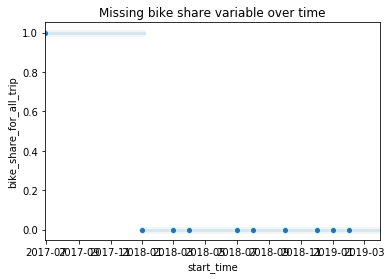

In [69]:
missing_bikeshare = df['bike_share_for_all_trip'].isnull()

ax = sns.scatterplot(x=pd.to_datetime(df['start_time']), y=missing_bikeshare,alpha=.8)
ax.set_xlim(pd.to_datetime(df['start_time']).min(), pd.to_datetime(df['start_time']).max())
ax.set_title("Missing bike share variable over time")

fig = ax.get_figure()

In [11]:
df_short = df[:100]
df_short.shape

(100, 16)

In [14]:
# Extract the data we're interested in
lat = df_short['end_station_latitude'].values
lon = df_short['end_station_longitude'].values
population = df_short['duration_sec'].values
#area = cities['area_total_km2'].values


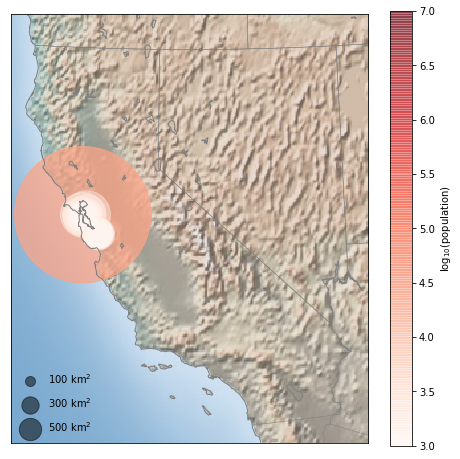

In [16]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=population,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');